# Fatimah Almusawi
## 9000400
### Lab 5 assignment

# 1- Data Tidying:
## **Part I**
### **Tuberculosis Dataset** 
This dataset outlines the number of tuberculosis patients in different countries in the year 2000.<br>
Dataset name: tb-raw.csv <br>
A few notes on the raw data set:<br>

- The columns starting with "m" or "f" contain multiple variables:  
    - Sex ("m" or "f")
    - Age Group ("0-14","15-24", "25-34", "45-54", "55-64", "65", "unknown")
- Mixture of 0s and missing values("NaN"). This is due to the data collection process and the distinction is important for this dataset.


#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.

In [41]:
import pandas as pd
import numpy as np


#first step is to read the csv file and expore the data
Tuberculosis_df = pd.read_csv('tb-raw.csv')
Tuberculosis_df



,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,AD,2000,0.0,0.0,1.0,0.0,0,0,0.0,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5,12,10.0,NaN,3.0
2,AF,2000,52.0,228.0,183.0,149.0,129,94,80.0,NaN,93.0
3,AG,2000,0.0,0.0,0.0,0.0,0,0,1.0,NaN,1.0
4,AL,2000,2.0,19.0,21.0,14.0,24,19,16.0,NaN,3.0
5,AM,2000,2.0,152.0,130.0,131.0,63,26,21.0,NaN,1.0
6,AN,2000,0.0,0.0,1.0,2.0,0,0,0.0,NaN,0.0
7,AO,2000,186.0,999.0,1003.0,912.0,482,312,194.0,NaN,247.0
8,AR,2000,97.0,278.0,594.0,402.0,419,368,330.0,NaN,121.0
9,AS,2000,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


This dataset is the most disorganized one I've seen!The column names are extremely unorganized and unreadable, with messy variables and values. Let's explore how we can enhance its organization and readability through data tidying.



In [42]:
# id_vars is the identifier variables (columns that won't change)
# var_name is the name where columns will be grouped in
# value_name is the value inside the cell which will be represented in a column

#Which columns do I want to keep, as they are? 
id_vars = ['country', 'year']



Tuberculosis_df_tidy= pd.melt(Tuberculosis_df,id_vars=id_vars,var_name='gender_age', value_name="number_of_patients")
Tuberculosis_df_tidy


,country,year,gender_age,number_of_patients
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0
...,...,...,...,...
85,AM,2000,f014,1.0
86,AN,2000,f014,0.0
87,AO,2000,f014,247.0
88,AR,2000,f014,121.0


In [43]:
#it's look better now  but still we have to split the gender and age into two columns
Tuberculosis_df_tidy['gender']=Tuberculosis_df_tidy['gender_age'].str[0]
Tuberculosis_df_tidy['age_group']=Tuberculosis_df_tidy['gender_age'].str[1:]

In [44]:
#lets remove the "gender_age" column as we don't need it anymore
Tuberculosis_df_tidy.drop('gender_age', axis=1, inplace=True)
Tuberculosis_df_tidy

,country,year,number_of_patients,gender,age_group
0,AD,2000,0.0,m,014
1,AE,2000,2.0,m,014
2,AF,2000,52.0,m,014
3,AG,2000,0.0,m,014
4,AL,2000,2.0,m,014
...,...,...,...,...,...
85,AM,2000,1.0,f,014
86,AN,2000,0.0,f,014
87,AO,2000,247.0,f,014
88,AR,2000,121.0,f,014


In [48]:

# replace 'm' with 'Male' and 'f' with 'Female' for clarity
Tuberculosis_df_tidy['gender']=Tuberculosis_df_tidy['gender'].replace({'m':'male','f':'female'})
Tuberculosis_df_tidy
# Assuming melted_df is your DataFrame after transformation and splitting
# Reorder the columns to match the desired order
reordered_df = Tuberculosis_df_tidy[['country', 'year', 'age_group', 'gender', 'number_of_patients']]


# Display the first few rows of the DataFrame with reordered columns
print(reordered_df.head(20))


   country  year age_group gender  number_of_patients
0       AD  2000       014   male                 0.0
1       AE  2000       014   male                 2.0
2       AF  2000       014   male                52.0
3       AG  2000       014   male                 0.0
4       AL  2000       014   male                 2.0
5       AM  2000       014   male                 2.0
6       AN  2000       014   male                 0.0
7       AO  2000       014   male               186.0
8       AR  2000       014   male                97.0
9       AS  2000       014   male                 NaN
10      AD  2000      1524   male                 0.0
11      AE  2000      1524   male                 4.0
12      AF  2000      1524   male               228.0
13      AG  2000      1524   male                 0.0
14      AL  2000      1524   male                19.0
15      AM  2000      1524   male               152.0
16      AN  2000      1524   male                 0.0
17      AO  2000      1524  

the other improvment can be cganging age gruop format(for example: 014 to 0-14) to make it more clear

In [49]:
import pandas as pd



# Define a function to format the age_group values
def format_age_group(age_group):
    # Check if age_group is in the expected format (e.g., '014', '1524')
    if age_group.isdigit() and len(age_group) > 2:
        # Insert a dash after the first one or two digits to standardize the age group representation
        return age_group[:len(age_group)//2] + '-' + age_group[len(age_group)//2:]
    else:
        # Return the age_group as is if it doesn't match the expected format
        return age_group

# Apply the function to the 'age_group' column
reordered_df['age_group'] = reordered_df['age_group'].apply(format_age_group)

# Display the first few rows to verify the changes
print(reordered_df.head(30))


   country  year age_group gender  number_of_patients
0       AD  2000      0-14   male                 0.0
1       AE  2000      0-14   male                 2.0
2       AF  2000      0-14   male                52.0
3       AG  2000      0-14   male                 0.0
4       AL  2000      0-14   male                 2.0
5       AM  2000      0-14   male                 2.0
6       AN  2000      0-14   male                 0.0
7       AO  2000      0-14   male               186.0
8       AR  2000      0-14   male                97.0
9       AS  2000      0-14   male                 NaN
10      AD  2000     15-24   male                 0.0
11      AE  2000     15-24   male                 4.0
12      AF  2000     15-24   male               228.0
13      AG  2000     15-24   male                 0.0
14      AL  2000     15-24   male                19.0
15      AM  2000     15-24   male               152.0
16      AN  2000     15-24   male                 0.0
17      AO  2000     15-24  

now everything looks finee exept the misssing data"NaN"
for handling missing data there are diffrent method. first one is drop the rows that have them. however it is important to check if there are many NaN ,this methos is not good because we will delete many rows and miss data

In [50]:
# get the number of missing data points per column
missing_values_Tuberculosis_df = reordered_df.isnull().sum()
#look at the missing value
print(missing_values_Tuberculosis_df)

country                0
year                   0
age_group              0
gender                 0
number_of_patients    17
dtype: int64


**Fill The Missing Data**
I believe that dropping missing values in this case isn't the most suitable approach, as it would  remove 17 rows. Let's consider an alternative strategy:

Filling in the missing values with zero as a preferable option for several reasons:


Looking at the dataset, we see a lot of zeros. Because of this, it makes sense to fill in the missing spots with zeros too, since zeros show up often in the data and aren't just standing in for missing info.

The method of imputing missing data with the mean, median, or mode does not appear to be optimal for this particular case. This is because there's a significant variance among the values within the dataset. For instance, within the age group of 0-14, we observe values such as 0, 2, and 186, among others. Given this wide range of values, employing the mean, median, or mode for imputation might not adequately represent the dataset's characteristics.





In [52]:
#fill the missing value with 0
reordered_df_temp=reordered_df.fillna(0)
reordered_df_temp.head(20)

,country,year,age_group,gender,number_of_patients
0,AD,2000,0-14,male,0.0
1,AE,2000,0-14,male,2.0
2,AF,2000,0-14,male,52.0
3,AG,2000,0-14,male,0.0
4,AL,2000,0-14,male,2.0
5,AM,2000,0-14,male,2.0
6,AN,2000,0-14,male,0.0
7,AO,2000,0-14,male,186.0
8,AR,2000,0-14,male,97.0
9,AS,2000,0-14,male,0.0


## **Part II**

Observe the following dataset: ./CSVs/salesMinimized.csv 
Please observe columns thoroughly as you need to apply some common-sense to represent the columns correctly.

#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.


In [153]:
sales_df=pd.read_csv('salesMinimized.csv')
sales_df.head(10)


,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,...,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70
0,0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,...,0,0,0,0,20,0,2,13,13,0
8,8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,...,0,4,0,4,0,1,1,3,0,2
9,9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Ok, lets start cleaning and organazing this mess!! :)



In [154]:
#Step 1: Remove Unnecessary Columns:
#The Unnamed: 0 column seems that doesn't hold any meaningful information, it might be an artifact of the CSV import process
# lets remove it.
sales_df.drop('Unnamed: 0', axis=1, inplace=True)

#step 2: The dataset is in a wide format, with each day's sales as a separate column.
# it's usaully more useful to have the dataset in a long format, where each row represents
# a single day's sales for an item. This can be achieved by "melting" the dataframe.
sales_df_tidy = pd.melt(sales_df, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='day', value_name='sales')

sales_df_tidy.tail(20)

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales
139980,FOODS_2_154_CA_1_validation,FOODS_2_154,FOODS_2,FOODS,CA_1,CA,d_70,4
139981,FOODS_2_155_CA_1_validation,FOODS_2_155,FOODS_2,FOODS,CA_1,CA,d_70,0
139982,FOODS_2_156_CA_1_validation,FOODS_2_156,FOODS_2,FOODS,CA_1,CA,d_70,1
139983,FOODS_2_157_CA_1_validation,FOODS_2_157,FOODS_2,FOODS,CA_1,CA,d_70,0
139984,FOODS_2_158_CA_1_validation,FOODS_2_158,FOODS_2,FOODS,CA_1,CA,d_70,0
139985,FOODS_2_159_CA_1_validation,FOODS_2_159,FOODS_2,FOODS,CA_1,CA,d_70,0
139986,FOODS_2_160_CA_1_validation,FOODS_2_160,FOODS_2,FOODS,CA_1,CA,d_70,0
139987,FOODS_2_161_CA_1_validation,FOODS_2_161,FOODS_2,FOODS,CA_1,CA,d_70,0
139988,FOODS_2_162_CA_1_validation,FOODS_2_162,FOODS_2,FOODS,CA_1,CA,d_70,0
139989,FOODS_2_163_CA_1_validation,FOODS_2_163,FOODS_2,FOODS,CA_1,CA,d_70,0


The dataset now its look much more better but still there are more we can do:

**step 3**

the day column values like d_1, d_2, etc., need to be converted into a more readable format or parsed into actual dates if the starting date is known.however there is no start date here,so we might just convert them into a numerical format that's easier to understand.

In [155]:
# Ensure 'day' is treated as a string
sales_df_tidy['day'] = sales_df_tidy['day'].astype(str)

# Extract the numeric part of the 'day' string
day_numbers = sales_df_tidy['day'].str.extract('d_(\d+)')[0]

# Construct the new format 'day-x' where x is the day number
sales_df_tidy['day'] = 'day-' + day_numbers

# Check the transformation
sales_df_tidy.head(10)


,id,item_id,dept_id,cat_id,store_id,state_id,day,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,day-1,12
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,day-1,2
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0


**Step 4: Column id**
The id column in our dataset is combining several pieces of information into one compact form.
 It includes item_id,store_id and a tag indicating its validation status. At first glance, splitting this column into separate parts seems like a good idea because it could make our data clearer and more detailed, allowing us to analyze each piece of information separately. For example, we could more easily compare sales of different item types or see how sales vary from store to store.

However, after a closer look,I realized that our dataset already has separate columns for most of this information. Splitting the id column would mean creating new columns that tell us things we already know, essentially duplicating data we already have. This duplication wouldn't add new insights or value to our analysis; it would just make our dataset bigger and potentially more confusing.

So, i decided to keep the id column as it is. and showing the dataset without it



In [117]:
sales_df_tidy =sales_df_tidy[['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'day', 'sales']]
#we can also rename the columns to make them more descriptive
sales_df_tidy= sales_df_tidy.rename(columns={'item_id': 'item_ID', 'dept_id': 'department', 'cat_id': 'category', 'store_id': 'store', 'state_id': 'state'})
sales_df_tidy.head(10)

,item_ID,department,category,store,state,day,sales
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
5,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
6,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0
7,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,day-1,12
8,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,day-1,2
9,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,day-1,0


## PART III
Using Boston House pricing dataset, apply outlier detection techniques discussed in class to detect outliers. Use different techniques and comment your code. <br>
You need to check how to load the dataset correctly! <br>
1. You should include some Visualization techniques
2. You should include some statistical approaches
3. You should analyze your attributes using Univariant and multivariant outlier detection techniques.
4. Choose one or more of your outlier detection techniques and remove outliers

In [2]:
# Importing
#data_url = "http://lib.stat.cmu.edu/datasets/boston"

import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**1_Visualization Techniques**

Visualization is a powerful initial step to detect outliers.here we will use Boxplot and sccater:



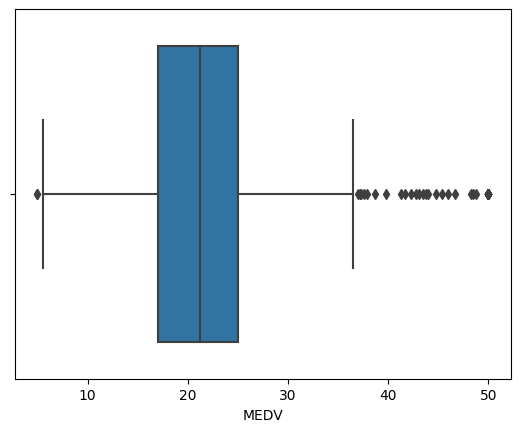

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of the median value of homes
sns.boxplot(x=df['MEDV'])
plt.show()

# # Scatter plot of 'RM' vs 'MEDV' (average number of rooms per dwelling vs median value)
# plt.scatter(df['RM'], df['MEDV'])
# plt.xlabel('Average Number of Rooms')
# plt.ylabel('Median Value of Homes')
# plt.show()


The boxplot visualization helps in understanding the distribution of median values of homes (MDEV) in the dataset. here we can see a tail of points in the boxplot after MDEV=38, it indicates the presence of outliers in the higher end of the home values. These outliers are values that lie outside the typical range of data, suggesting that homes with a median value above 38 are significantly more expensive than the majority of homes in the dataset. 

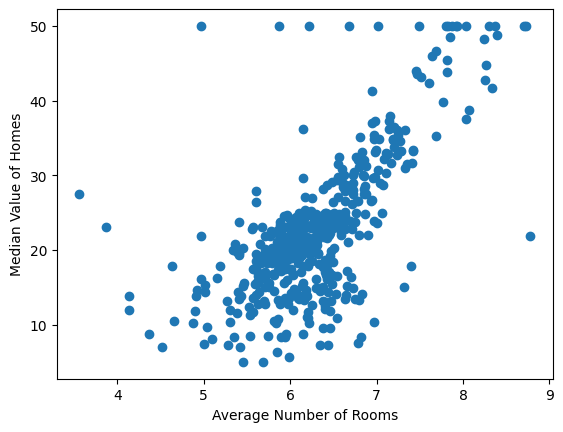

In [4]:
# Scatter plot of 'RM' vs 'MEDV' (average number of rooms per dwelling vs median value)
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Homes')
plt.show()


here we can see a horizontal line of points at median value of home=50. This could indicate a ceiling effect in the dataset where homes are capped at a median value of 50, possibly due to data collection methods or an actual cap in the housing market values within the dataset's context. These homes might be significantly different in characteristics or location from the rest of the data, or it could be an artifact of how the data was recorded. 

In both plots, these points, although they might have some significance, are considered outliers and we should find a way to handle them.

In [151]:
## Getting positions of outliers
import numpy as np
print(np.where((df['RM']>8) & (df['MEDV']<49)))


(array([ 97, 224, 226, 232, 233, 253, 262, 364], dtype=int64),)


**2_Statistical Approaches**

Z-Score
The Z-score is a measure of how many standard deviations an element is from the mean. A common threshold is to label data points with a Z-score greater than 3 or less than -3 as outliers.
lets try it:

In [161]:
# Z score
from scipy import stats
 
# Calculate the Z-scores of each column
z = np.abs(stats.zscore(df))

print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

the above out put shoes the outliers. however these are the postion of them:
The output consists of two arrays:

The first array lists the row indices of the outliers.
The second array corresponds to the column indices for each outlier identified in the first array.
for exapmle the 55 in the first array and 1 in the second array at the same position, it means that the data point in row 55, column 1 of your DataFrame is considered an outlier because its Z-score is greater than 3(as we set the threshold = 3).
This is a common criterion for identifying outliers in a dataset, as it signifies that the data point is more than 3 standard deviations away from the mean, which is statistically significant in a normal distribution.


In [163]:

# make a new copy of the dataframe(always is good to have a backup)
#print the shape of the dataframe
print("Old Shape: ", df.shape)
df_copy = df.copy()
# Identify rows with any outliers
rows_with_outliers = np.unique(np.where(z > 3)[0])

# Drop these rows from the DataFrame
df_copy = df.drop(index=rows_with_outliers)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)



Old Shape:  (506, 14)
New Shape:  (415, 14)


Using the Z-score method for outlier detection on the Boston House Pricing dataset resulted in a new DataFrame with 415 observations from the original 506. This indicates that the Z-score method identified and removed a moderate number of outliers, retaining a substantial portion of the data. This outcome suggests that the Z-score approach, which focuses on how many standard deviations away points are from the mean, provided a balanced way of detecting outliers without drastically reducing the dataset size.
however I feel its not the correct way to handle the outliers as we deleted around 80 rows! so what if this rows contain valuable information for our analysis?!
 

**3_Univariate Outlier Detection**

IQR (Inter-Quartile Range)

lets try another Approaches which is :IQR (Inter-Quartile Range)
The IQR is calculated by subtracting the first quartile (Q1) from the third quartile (Q3):
**IQR=Q3−Q1**
How is IQR Used to Identify Outliers?
Once the IQR is calculated, it can be used to define the boundaries for outliers. The common rule of thumb is that any data point that lies more than 1.5 times the IQR above the third quartile or below the first quartile is considered an outlier:

- Lower Bound: Q1−1.5×IQR
- Upper Bound: Q3+1.5×IQR
Data points outside these bounds can be flagged as outliers.


In [167]:
import pandas as pd
import numpy as np


# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
IQR = Q3 - Q1

# Determine the outliers using the IQR
# Any value that is less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR is an outlier
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Print the outliers
print("Outliers detected in the dataset:\n", outliers)

# If you want to remove rows that contain any outliers
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the original and cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Outliers detected in the dataset:
       CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX   
0    False  False  False  False  False  False  False  False  False  False  \
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT   MEDV  
0   


This approach identified more outliers compared to the Z-score method, likely because it is more sensitive to detecting outliers in the context of our dataset. This sensitivity arises from how the method calculates the range between the first quartile (25th percentile) and the third quartile (75th percentile), identifying outliers as those points that fall below or above this range by a certain factor (commonly 1.5 times the IQR, as we applied). This method proves to be more robust for data with skewness, which suits our case, given that the outliers form a tail-like distribution.
  

conclusion:

for detecting the outliers there are many approches, each have its own pros and cons.based on what we have seen in this nootbook, applying the IQR method for outlier detection resulted in a cleaned DataFrame with 268 observations out of the original 506, indicating a significant reduction in size due to the removal of outliers. In contrast, using the Z-score method led to a new DataFrame with 415 observations, showing a less aggressive reduction. This suggests that the IQR method was more stringent in identifying outliers within this dataset, leading to the exclusion of a larger number of data points compared to the Z-score method. The difference in the number of observations retained highlights the IQR method's sensitivity to the specific skewness and distribution of the data, making it a more robust choice for this particular dataset, which likely exhibits characteristics (such as skewness) that the IQR method is better suited to handle.
